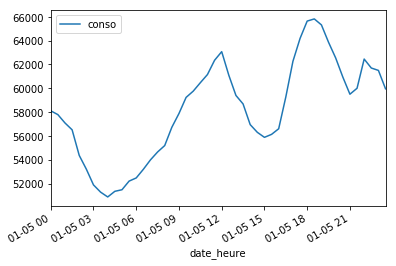

In [85]:
"""
https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={}&refine.date_heure={}

Step 1 : find the right url on rte-opendata.opendatasoft.com
Step 2 : request it 
Step 3 : save the response it json format
Step 4 : create a dataframe with the data with pd.DataFrame.from_dict
Step 5 : Clean the datetime column
Step 6 : plot
"""
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

# Modifier les variables 
DATASET = "cdc_conso"
DATE= "2014-01-05".replace('-','%2F')
ROWS = 100
COLUMN = 'conso'
###########

url = "https://rte-opendata.opendatasoft.com/api/records/1.0/search/?dataset={}&rows={}&refine.date_heure={}".format(DATASET,ROWS,DATE)
result = requests.get(url).json()
records = result["records"]
ma_liste_finale = []
for record in records:
    ma_liste_finale.append(record['fields'])
df = pd.DataFrame(ma_liste_finale)
df['date_heure'] = pd.to_datetime(df['date_heure'])
df.plot(x='date_heure',y=COLUMN)